# Preprocessing

In [722]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [723]:
%autoreload 2

In [724]:
import torch

In [725]:
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.utils.descriptive_utils import *
from src.vfm.model.physics.physics_informed import PhysicsInformedHybridModel
from src.utils import *
import json

In [726]:
connection = Connection()
# Get client
client = connection.get_client()

In [753]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test',
       'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm',
       'well_id'],
      dtype='object')

In [754]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [755]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Preprocessing well W06 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W08 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W10 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W11 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W15 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W18 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mp

755

In [756]:
summarize_null(df_all_wells_preprocessed)

qo_well_test     0
qg_well_test     0
qw_well_test     0
well_code        0
dhp              0
dht              0
whp              0
wht              0
choke            0
dcp              0
qo_mpfm         30
qg_mpfm         30
qw_mpfm         30
wc_mpfm          0
well_id          0
time_idx         0
dtype: int64

In [838]:
df_train, df_val, df_test = get_random_train_test_split_per_well_with_order_preserved(df=df_all_wells_preprocessed)
len(df_train), len(df_val), len(df_test)

(543, 77, 135)

In [839]:
well_geometry: dict = None

with open(r"data\well_geometry.json", "r") as f:
    well_geometry = json.load(f)



In [860]:
well_geometry = None
model = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry,
)
model.fit(df=df_train, df_val=df_val)

[Validation] Residual RMSE = 0.5706


In [861]:
model.score_physics(df_test)

{'W06': {'qo': {'r2': 0.5279684165055842,
   'mae': 14.48225129011946,
   'rmse': 18.80015489828391,
   'mape (%)': 15.605977393273765,
   'mpe (%)': 2.001588423763314},
  'qw': {'r2': 0.029125345930226088,
   'mae': 1.075003740658879,
   'rmse': 1.1094816251167743,
   'mape (%)': 1430.9320260046848,
   'mpe (%)': 1390.4509118958597},
  'qg': {'r2': 0.789094497948239,
   'mae': 1822.8700182765483,
   'rmse': 2206.5543704631364,
   'mape (%)': 2373.2315344432373,
   'mpe (%)': 2356.7933492272523},
  'wgr': {'r2': -0.034459980306516425,
   'mae': 6.215560329762909e-05,
   'rmse': 6.356788061970806e-05,
   'mape (%)': 478.34905953606324,
   'mpe (%)': 435.9134236629182},
  'gor': {'r2': 0.808138141171068,
   'mae': 7.797083435149196,
   'rmse': 14.402313939403083,
   'mape (%)': 1192.5235785027191,
   'mpe (%)': 1186.8141630942653}},
 'W08': {'qo': {'r2': -1.084715806941059,
   'mae': 8.229830026701213,
   'rmse': 11.12434479645091,
   'mape (%)': 71.60940370322913,
   'mpe (%)': 66.83508

In [862]:
model.score_hybrid(df_test)

{'W06': {'qo': {'r2': 0.7411873271771355,
   'mae': 11.056583059626956,
   'rmse': 13.920943389398587,
   'mape (%)': 8.221366348990616,
   'mpe (%)': -5.726484120156882},
  'qw': {'r2': -1.5613611108198526,
   'mae': 1.40698741005061,
   'rmse': 1.8020794654275447,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'qg': {'r2': 0.94969854313973,
   'mae': 866.93742240833,
   'rmse': 1077.6083801156624,
   'mape (%)': 1216.939747655485,
   'mpe (%)': 1211.0964809449467},
  'wgr': {'r2': -2.6331556083742123,
   'mae': 0.00010141895877997915,
   'rmse': 0.00011913047809224835,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'gor': {'r2': 0.755319749647005,
   'mae': 11.218469592799899,
   'rmse': 16.26437606801305,
   'mape (%)': 1246.7432889186646,
   'mpe (%)': 1245.1865330727633}},
 'W08': {'qo': {'r2': 0.019388665123398763,
   'mae': 6.361395611532016,
   'rmse': 7.629559531279406,
   'mape (%)': 47.8934120896301,
   'mpe (%)': 35.781821030297806},
  'qw': {'r2': 0.8848743219887204,
   'm

In [863]:
model.score_mpfm(df=df_test)

{'W06': {'qo': {'r2': 0.946036413138588,
   'mae': 5.458446230911516,
   'rmse': 6.3566207731455755,
   'mape (%)': 4.099308262624471,
   'mpe (%)': 3.568869905293817},
  'qw': {'r2': -1.5418800301515905,
   'mae': 1.4025971540115252,
   'rmse': 1.79521329901443,
   'mape (%)': 99.83256942560334,
   'mpe (%)': -99.83256942560334},
  'qg': {'r2': 0.8257887678988658,
   'mae': 1099.8434290392158,
   'rmse': 2005.4357582742402,
   'mape (%)': 3528.4112354022654,
   'mpe (%)': 3528.4112354022654},
  'wgr': {'r2': -2.612455115910198,
   'mae': 0.0001011472728749954,
   'rmse': 0.0001187906106923255,
   'mape (%)': 99.81722564745013,
   'mpe (%)': -99.81722564745013},
  'gor': {'r2': -0.4755074805343724,
   'mae': 14.901485380203427,
   'rmse': 39.9400548822878,
   'mape (%)': 3654.0223385677527,
   'mpe (%)': 3650.7696909768897}},
 'W08': {'qo': {'r2': 0.06514268852606642,
   'mae': 3.988455852706947,
   'rmse': 7.449440849042942,
   'mape (%)': 45.45227422474612,
   'mpe (%)': 42.513748785

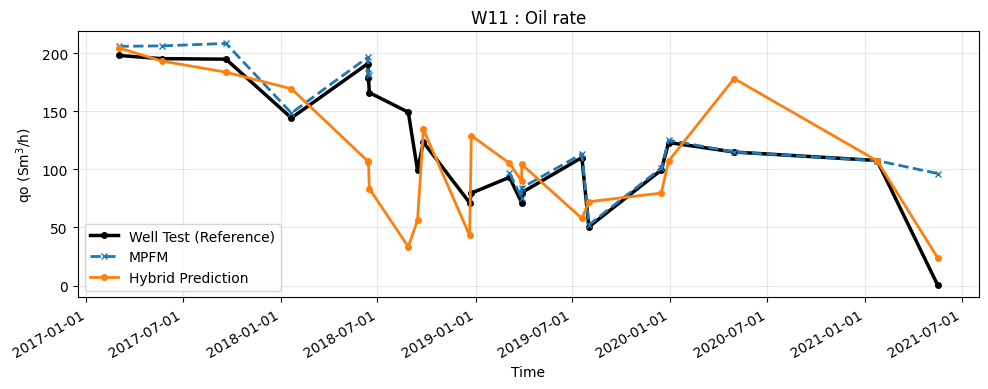

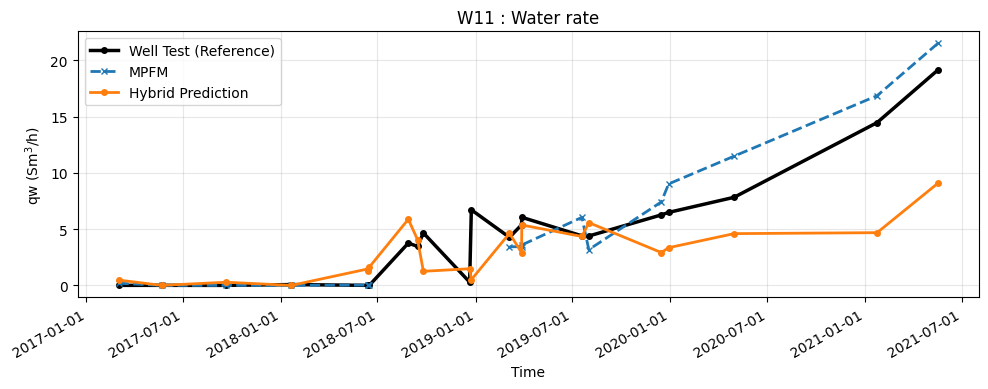

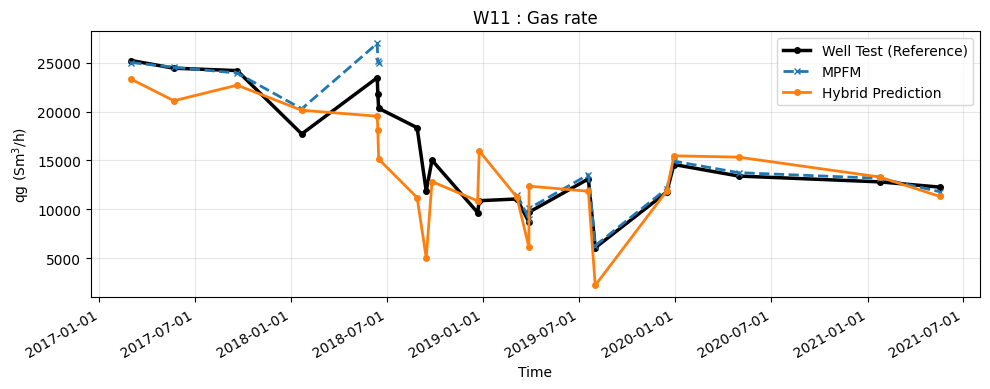

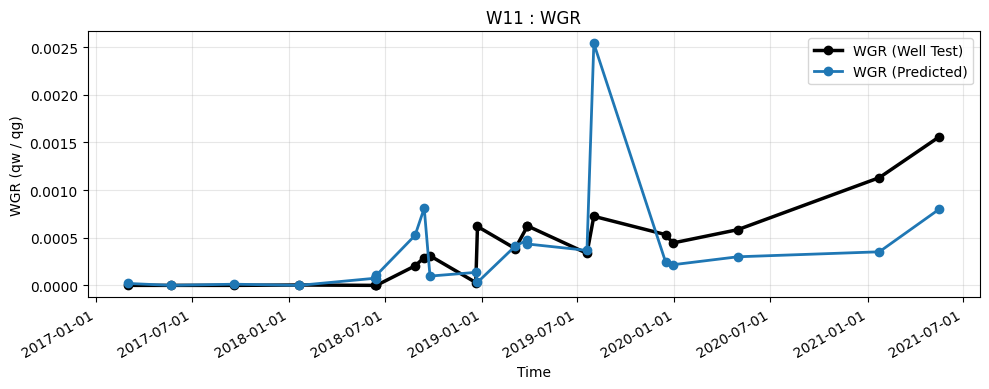

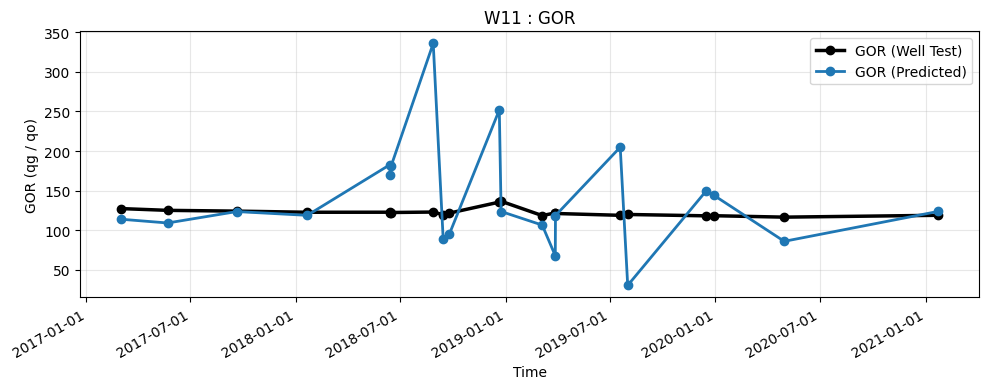

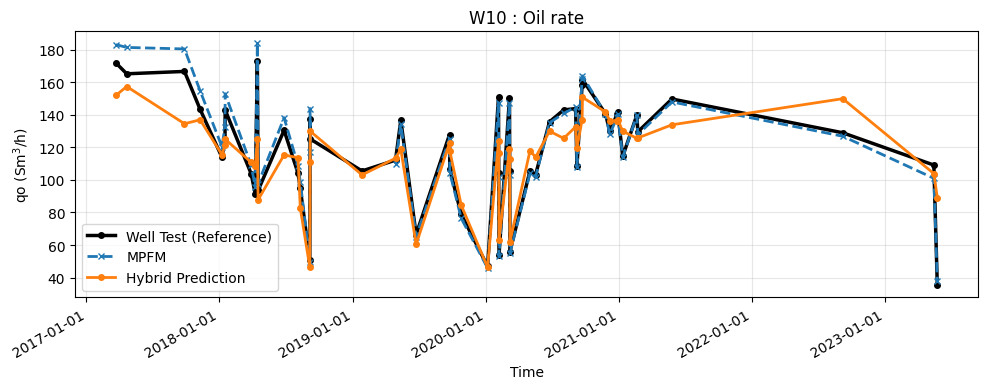

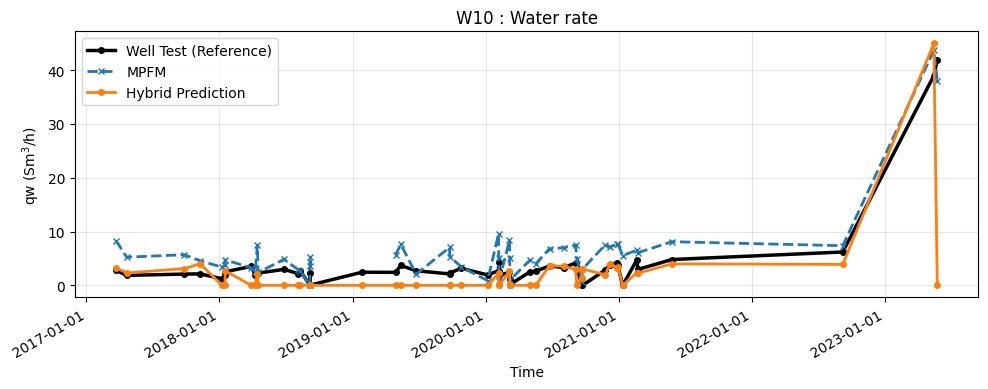

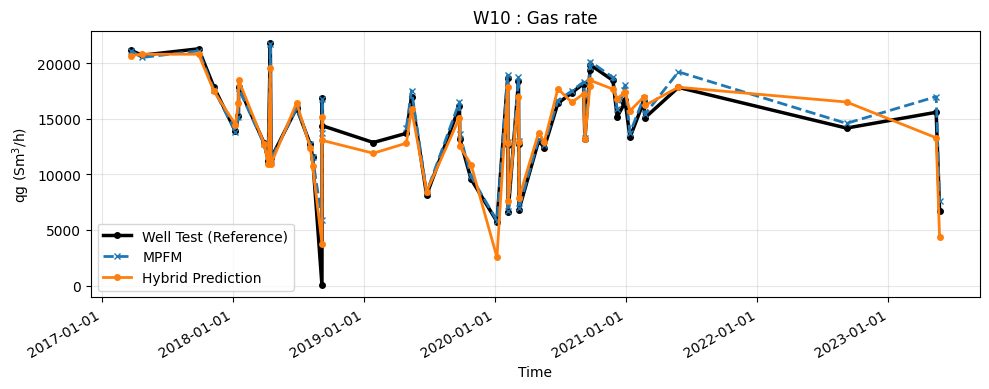

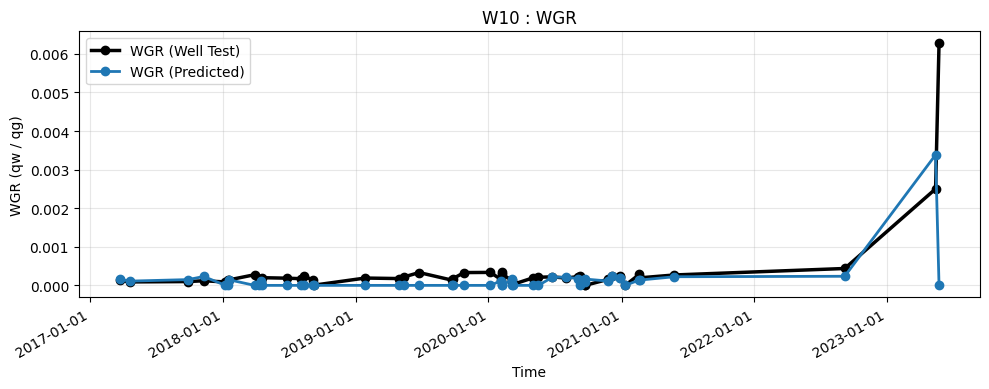

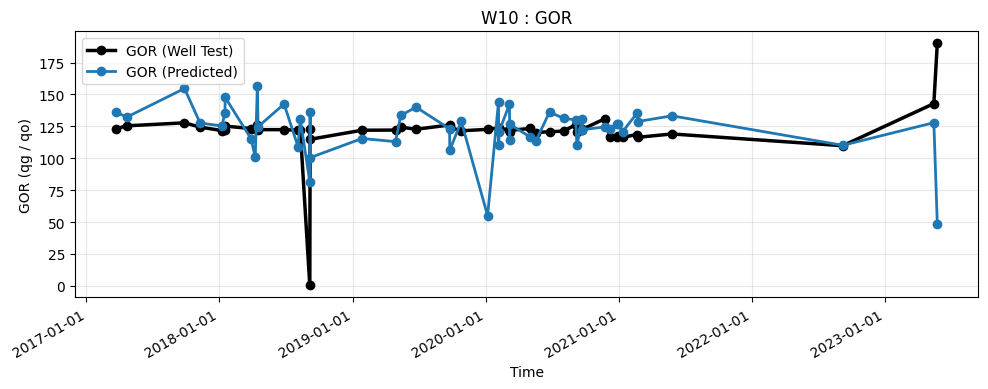

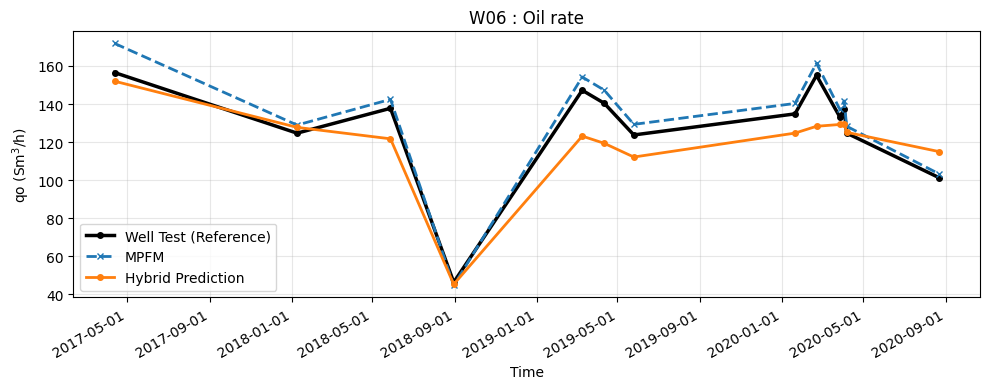

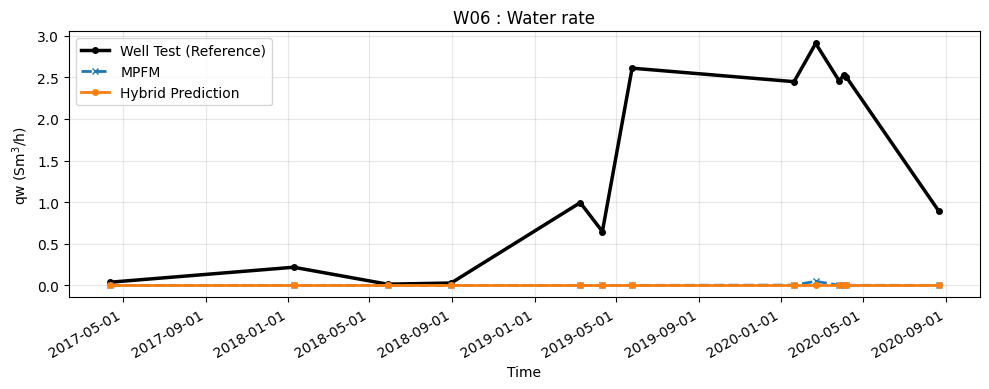

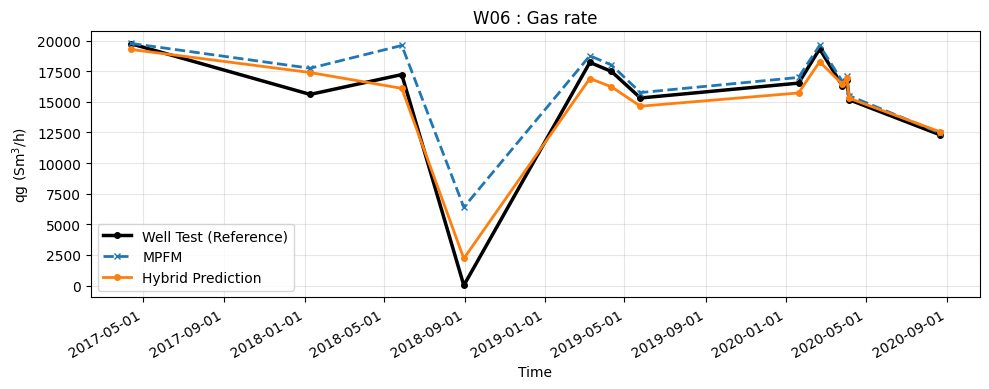

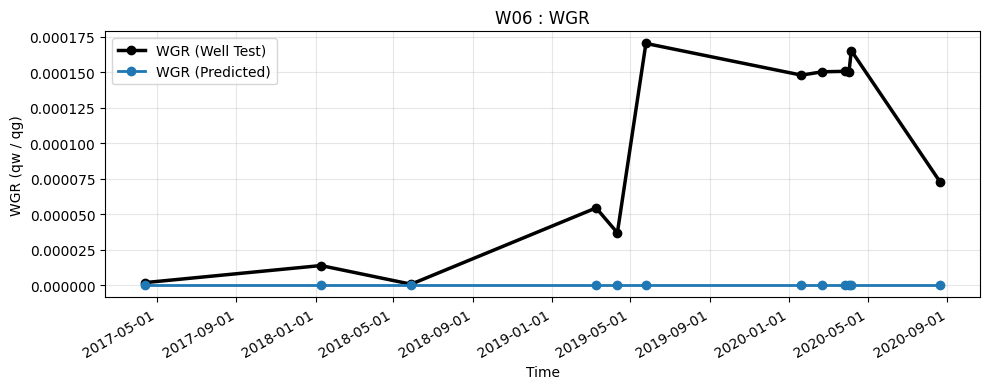

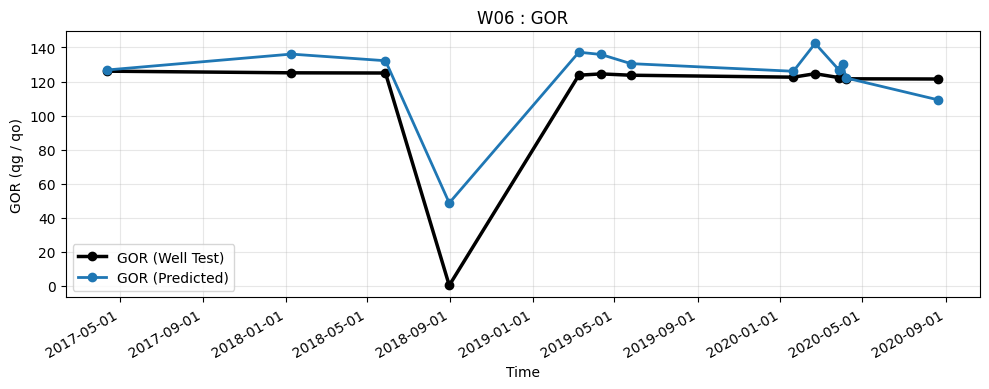

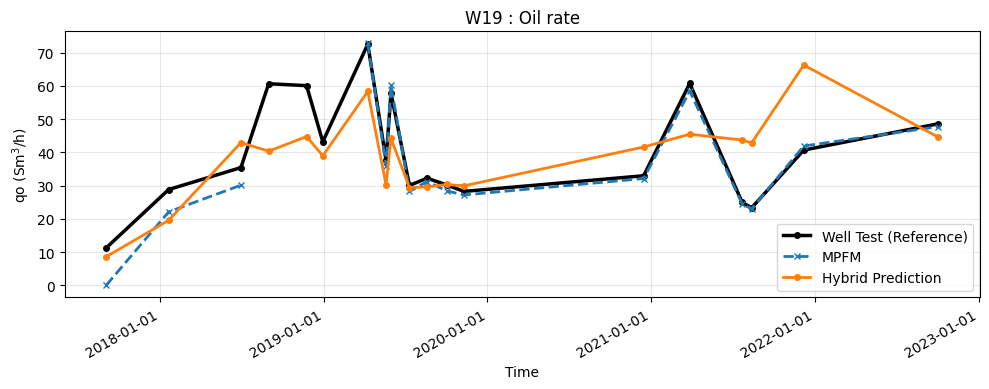

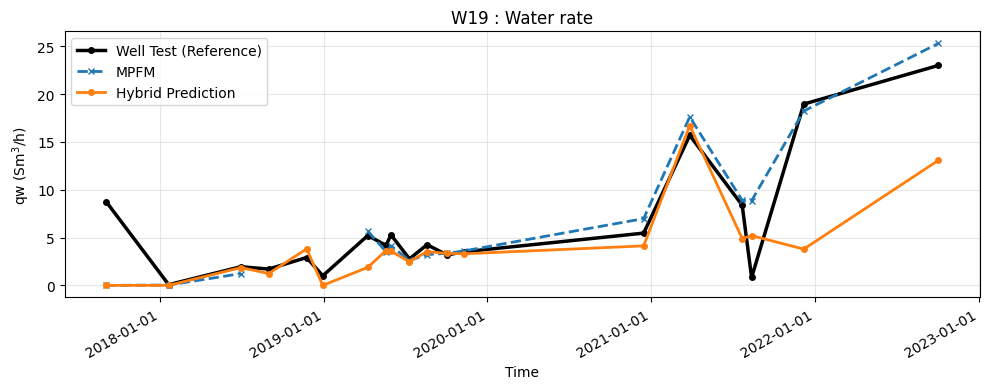

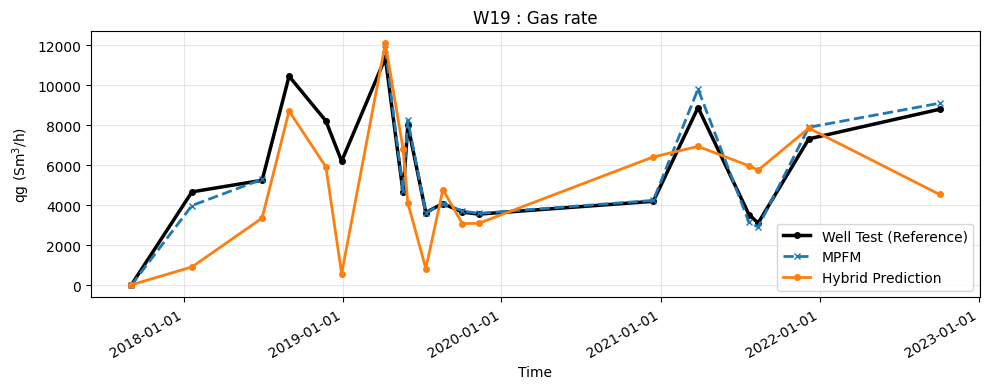

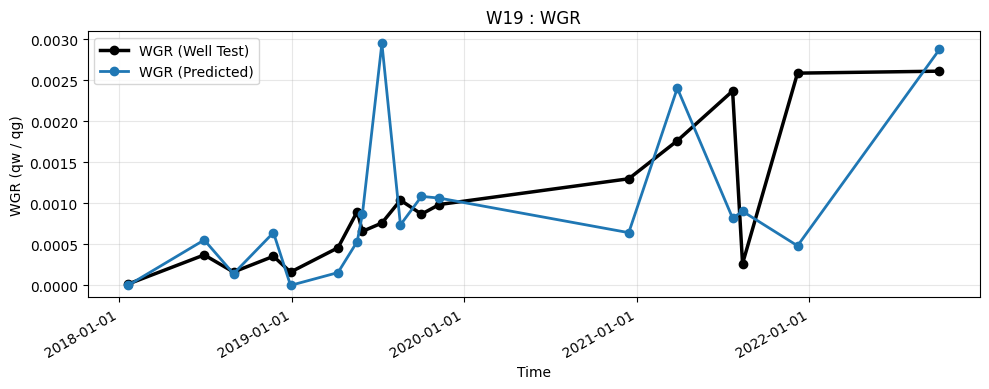

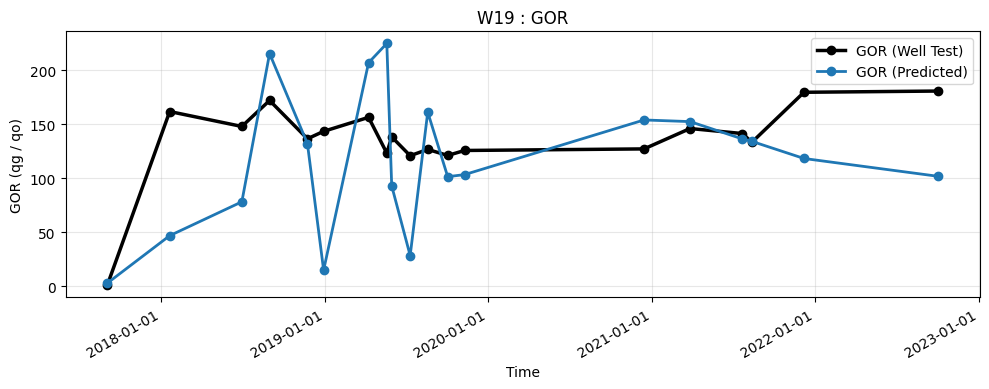

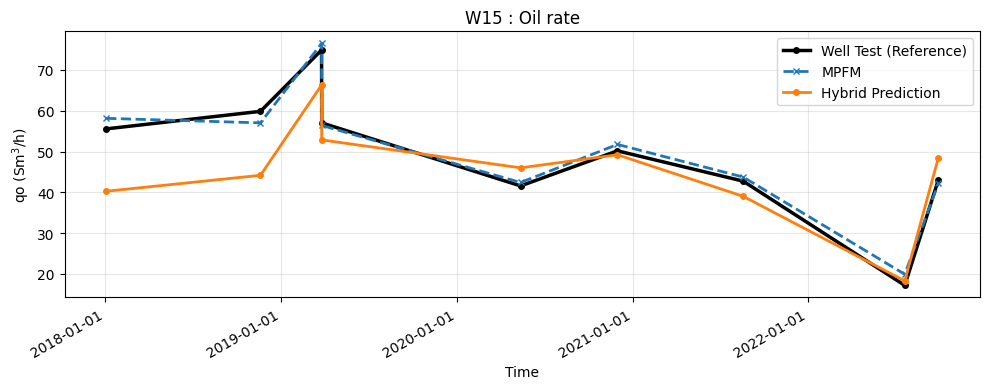

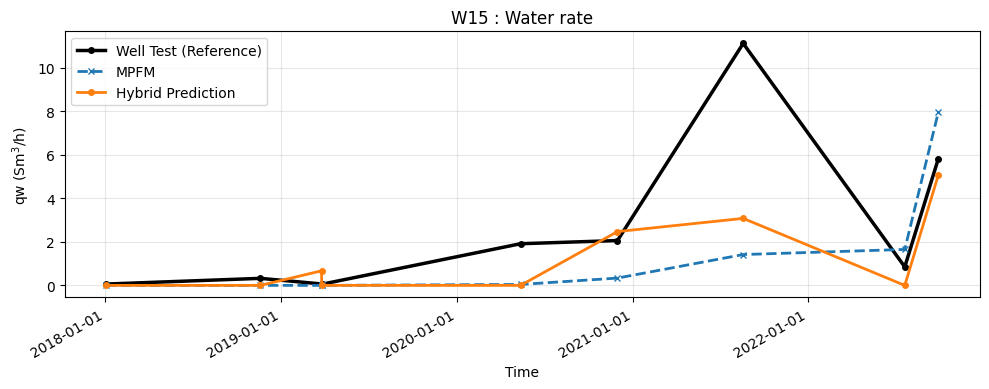

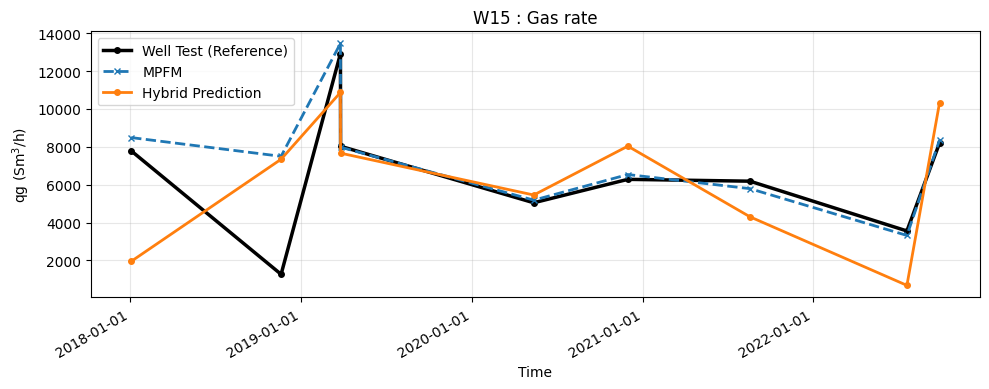

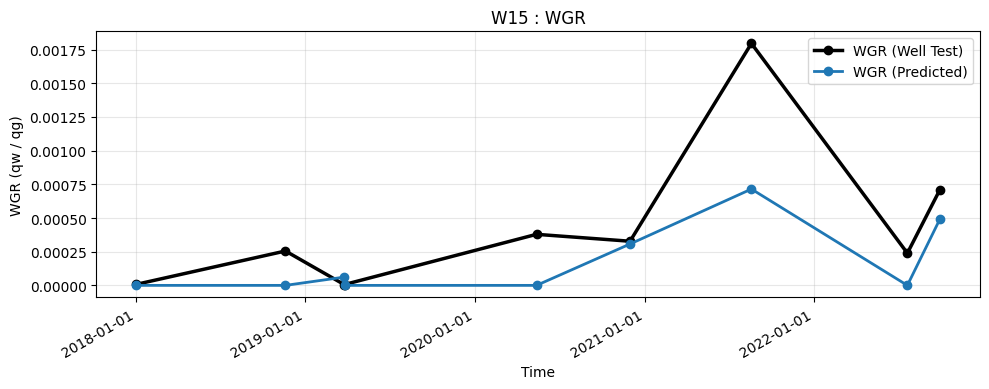

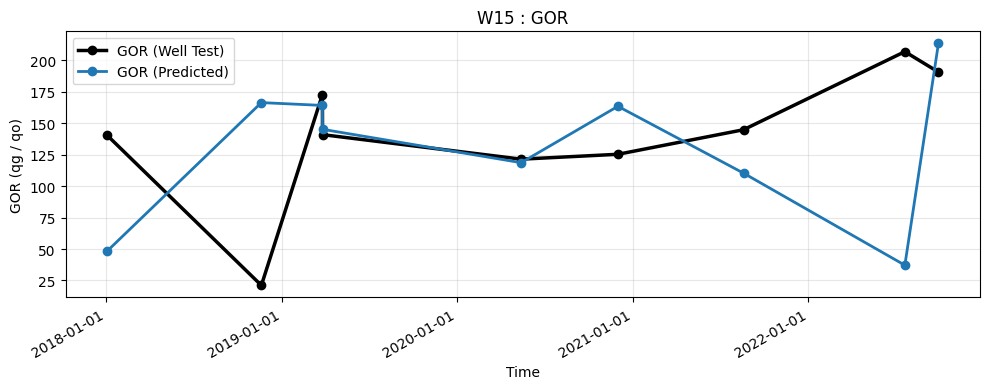

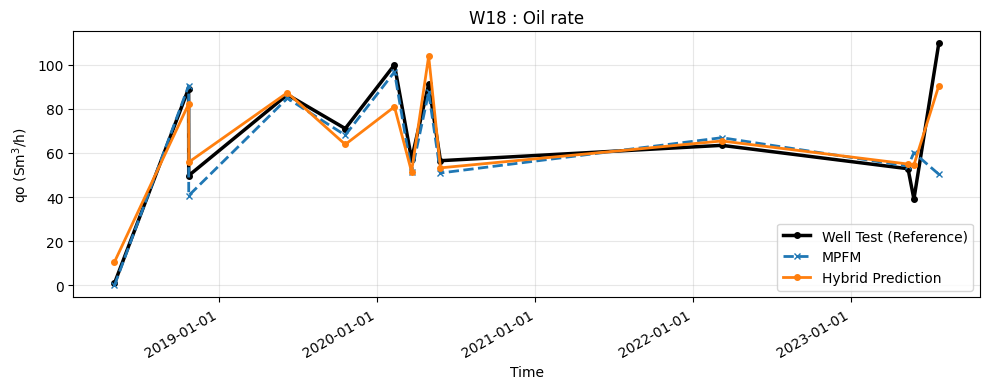

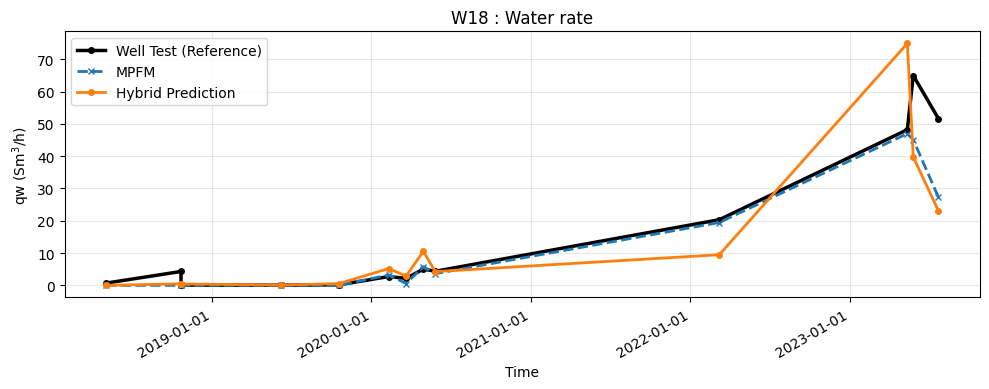

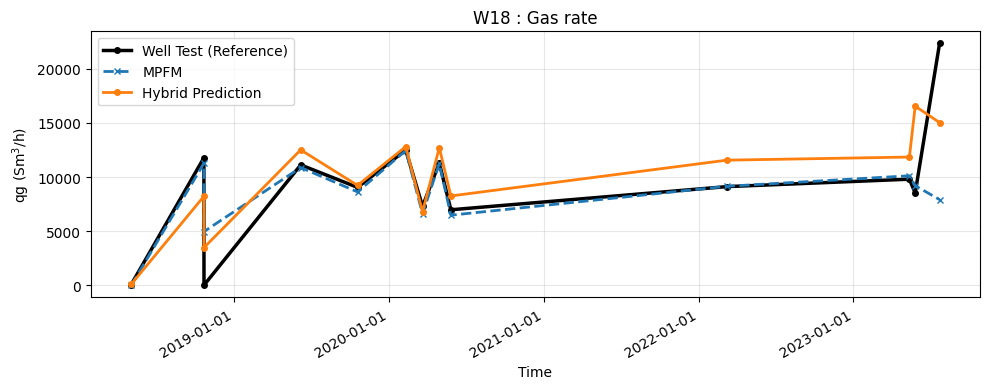

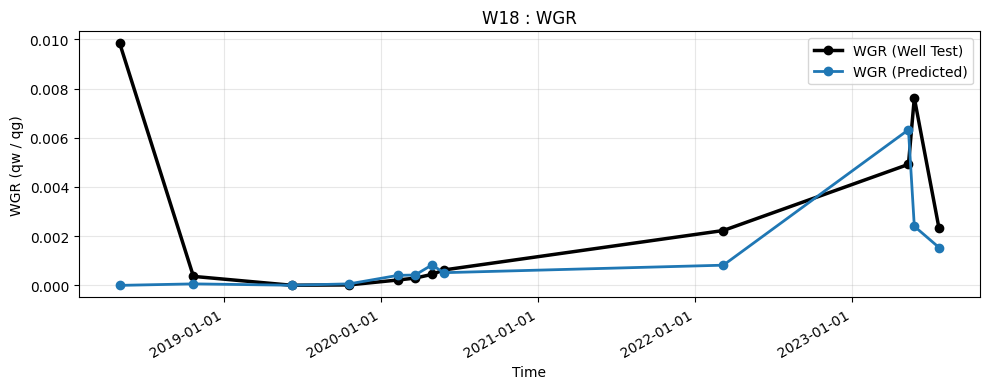

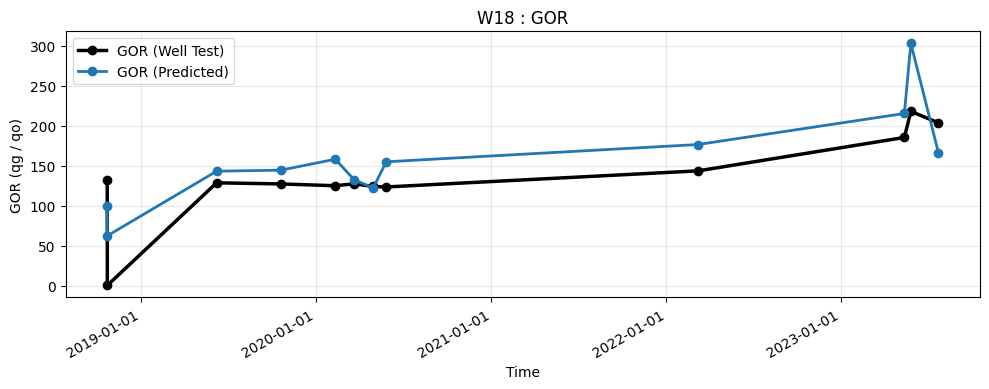

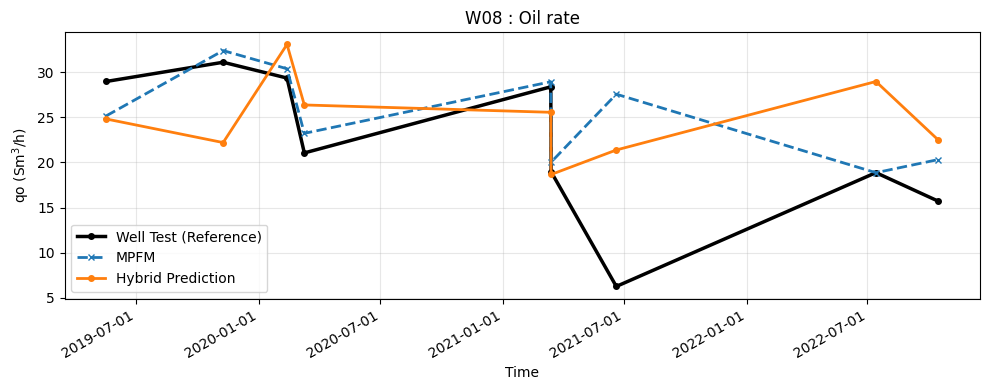

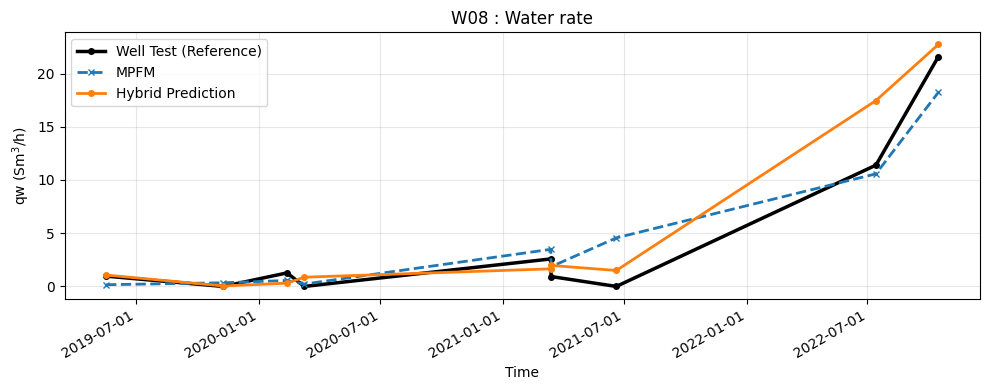

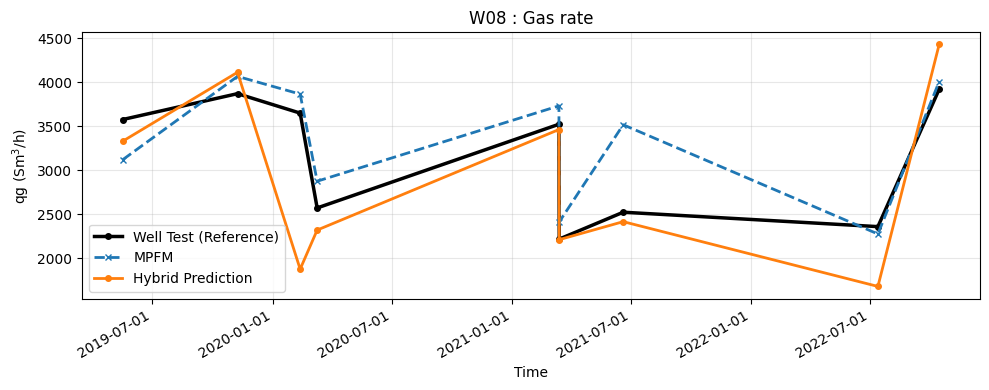

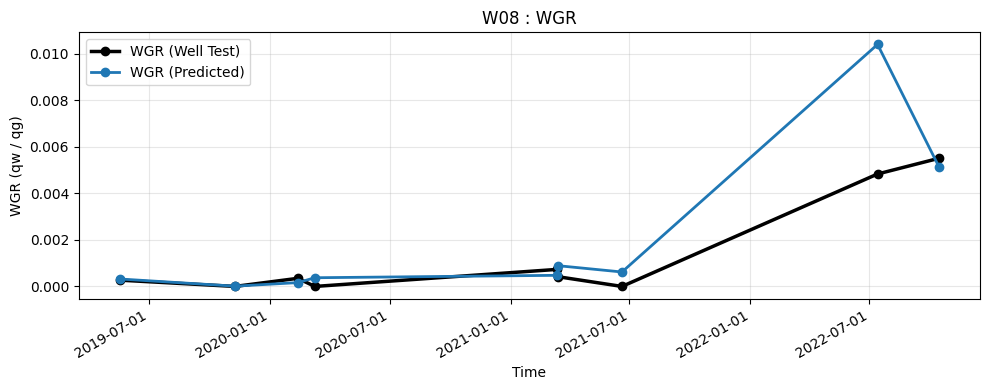

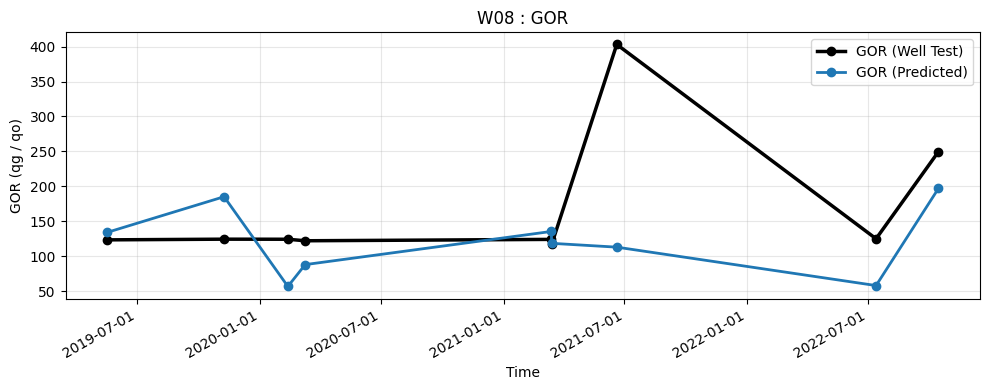

In [864]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### LOWO test

In [865]:
df_train_lowo, df_val_lowo, df_test_lowo = get_lowo_train_val_test_split(df=df_all_wells_preprocessed, test_well_id="W10")
len(df_train_lowo), len(df_val_lowo), len(df_test_lowo)

(420, 114, 221)

In [866]:
model_lowo = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=None)
model_lowo.fit(df=df_train_lowo, df_val=df_val_lowo)

[Validation] Residual RMSE = 0.7292


In [867]:
model_lowo.calibrate_physics_only(df=df_test_lowo)

In [868]:
model_lowo.score_physics(df_test_lowo)

{'W10': {'qo': {'r2': 0.47556607433646114,
   'mae': 17.673619283289852,
   'rmse': 23.26900576668434,
   'mape (%)': 19.381442695370303,
   'mpe (%)': 8.482728497727122},
  'qw': {'r2': 0.6396998489882725,
   'mae': 3.2731687203182953,
   'rmse': 6.1805074094121295,
   'mape (%)': 22011.02805104232,
   'mpe (%)': 21932.476605536216},
  'qg': {'r2': 0.691385437494612,
   'mae': 1649.563876159395,
   'rmse': 2271.268719635514,
   'mape (%)': 232.71448572342436,
   'mpe (%)': 217.65237180905382},
  'wgr': {'r2': 0.45557523193624994,
   'mae': 0.00028794772374146513,
   'rmse': 0.0006643996875771597,
   'mape (%)': 125.96550838670599,
   'mpe (%)': 46.96848134019096},
  'gor': {'r2': -1.1536899379404049,
   'mae': 12.462169023049004,
   'rmse': 22.307053433829395,
   'mape (%)': 137.0551698544054,
   'mpe (%)': 120.09949095776436}}}

In [869]:
model_lowo.score_hybrid(df_test_lowo)

{'W10': {'qo': {'r2': 0.48729283175654203,
   'mae': 18.255413542403527,
   'rmse': 23.007378260842682,
   'mape (%)': 16.26762965719341,
   'mpe (%)': 8.798849435651837},
  'qw': {'r2': 0.6648780220709625,
   'mae': 2.997268898716546,
   'rmse': 5.9606464748390025,
   'mape (%)': 272.3278159262792,
   'mpe (%)': 146.72302034634595},
  'qg': {'r2': -0.6031326567490569,
   'mae': 4018.9435181378794,
   'rmse': 5176.605181520508,
   'mape (%)': 46.683696544357495,
   'mpe (%)': -11.308406466479857},
  'wgr': {'r2': 0.5369277436657904,
   'mae': 0.0002508583073704923,
   'rmse': 0.0006127521775593125,
   'mape (%)': 84.76035523010731,
   'mpe (%)': -43.407698033463035},
  'gor': {'r2': -14.046824464832351,
   'mae': 43.89627764055772,
   'rmse': 58.96211389410994,
   'mape (%)': 49.89010139906209,
   'mpe (%)': -14.362047223377239}}}

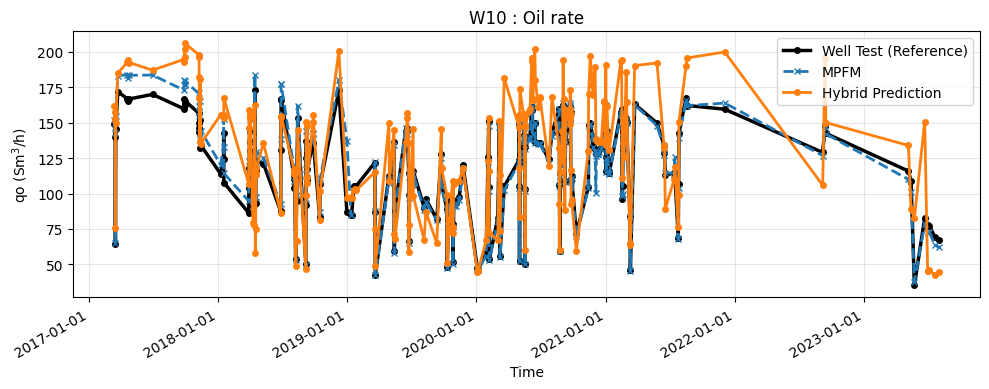

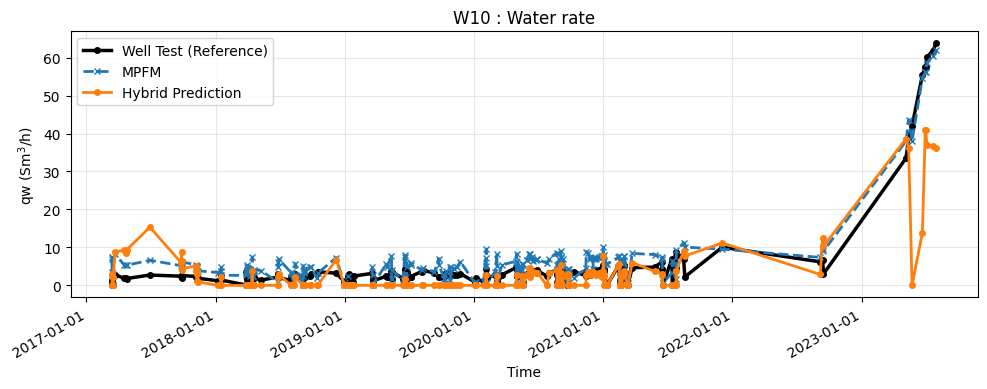

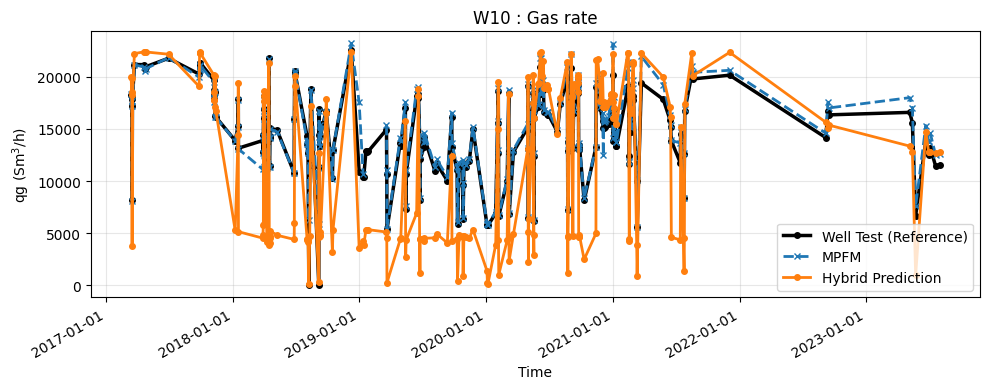

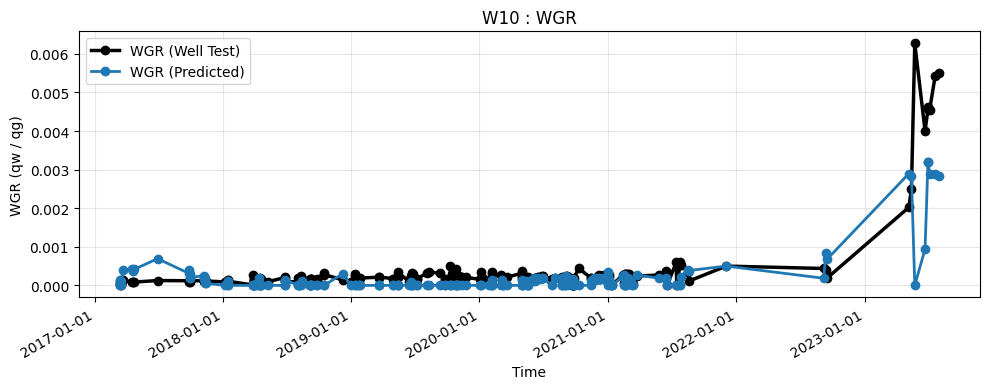

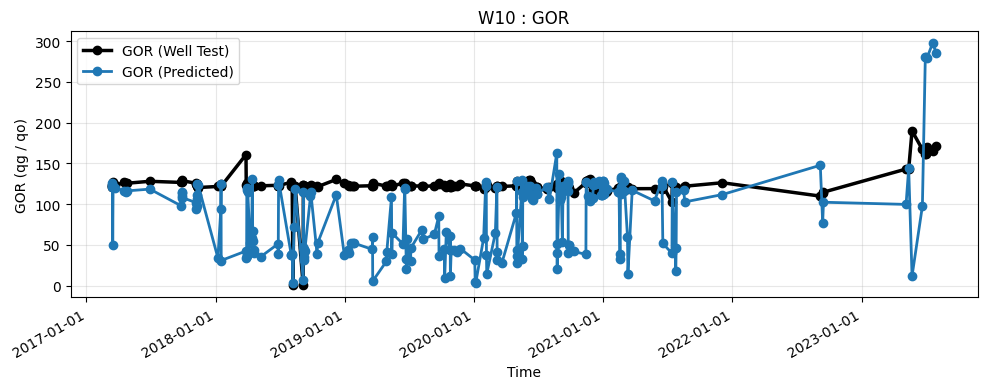

In [870]:
model_lowo.plot_predictions(df=df_test_lowo)

### Resample and interpolate

In [871]:
resampler = Resampler()
df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
print(summarize_null(df=df_resampled))
print(df_resampled.shape)

choke                 0
whp                   0
dcp                   0
dhp                   0
wht                   0
dht                   0
well_code             0
qo_well_test    2054830
qg_well_test    2054830
qw_well_test    2054830
qo_mpfm         2054860
qg_mpfm         2054860
qw_mpfm         2054860
wc_mpfm         2054830
time_idx              0
is_observed           0
well_id               0
dtype: int64
(2055585, 17)


In [872]:
df_resampled.index

RangeIndex(start=0, stop=2055585, step=1)

In [873]:
df_resampled.columns

Index(['choke', 'whp', 'dcp', 'dhp', 'wht', 'dht', 'well_code', 'qo_well_test',
       'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'qw_mpfm',
       'wc_mpfm', 'time_idx', 'is_observed', 'well_id'],
      dtype='object')

In [874]:
df_resampled[df_resampled["is_observed"] == 1].shape

(755, 17)

In [875]:
# Monotonic
df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

well_id
W06    True
W08    True
W10    True
W11    True
W15    True
W18    True
W19    True
Name: time_idx, dtype: bool

In [876]:
# df_generated = model.generate_dense_well_rates(df=df_resampled)
# df_generated

In [877]:
# summarize_null(df_generated)